---

# Siniestros viales.

----

# índice:

* Introducción
* Objetivo
* Librerías y configuraciones
* Carga de datos
* Dataset df_fallecimientos
    * Tamaño del dataset y análisis del tipo de variables
    * Diccionario de variables
    * Analisis de valores nulos y duplicados
    * Analisis de columnas sin datos (SD)
    * Análisis de los datos segun su tipo
    * Análisis de la columna 'participantes'
    * Cantidad de victimas totales a lo largo del tiempo y por año
        * Gáficos: Frecuencia y porcentaje de fallecidos por accidente entre 2016 y 2021
        * Gráfico: Cantidad de siniestros viales por año.
        * Gráfico: Histograma de siniestros viales por año
        * Gráfico temporal: Cantidad de fallecidos en Accidentes de transito entre 2016 y 2021
* Dataset df_víctimas
    * Tamaño del dataset y análisis del tipo de variables
    * Diccionario de variables
    * Analisis de valores nulos y duplicados
    * Analisis de columnas sin datos (SD)
    * Análisis de los datos segun su tipo
    * Análisis de la columna 'participantes'
    * Análisis de victimas  (2016 -2021)
    * Análisis de victimas  (2021)

---

# Introducción

El Observatorio de Movilidad y Seguridad Vial (OMSV), perteneciente a la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, nos ha proporcionado el conjunto de datos '/data/homicidios.xlsx', el cual está en formato xlsx y contiene dos hojas llamadas 'hechos' y 'víctimas' con información sobre los accidentes viales con víctimas fallecidas en CABA entre los años 2016 y 2021. Además, contiene dos hojas adicionales con diccionarios de datos a partir de las cuales se crearon los diccionarios que se encuentran en la carpeta 'data/diccionarios'. El archivo '/notebooks/diccionarios' contiene el ETL de estas dos últimas hojas.

# Objetivo
En el presente análisis de datos Buscaremos generar información que le permita a las autoridades de la Ciudad Autonónoma de Buenos Aires(CABA) tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales. 

# Librerías y configuraciones

In [1]:
# Importamos las librerías básicas:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator


import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


warnings.filterwarnings('ignore') # Para evitar los molestos avisos.

pd.set_option('display.max_colwidth', 200)
pd.options.display.max_columns = None


%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

paleta_de_colores = {
    'color_principal': '#009AAE',
    'color_principal_home': '#007A8A',
    'color_secundario': '#414042',
    'color_terciario': '#C0C0C0',
    'color_genero': '#592673'
}

plt.rcParams['font.family'] = 'Arial'
plt.style.use("_mpl-gallery-nogrid")

# Carga de datos

In [2]:

df_fallecimientos = pd.read_excel(io='../data/homicidios.xlsx',sheet_name ='HECHOS',)
df_victimas = pd.read_excel(io='../data/homicidios.xlsx',sheet_name ='VICTIMAS',)
df_diccionario_fallecimientos = pd.read_csv('../data/diccionarios/diccionario_valores_de_variables_del_df_homicidios.csv')
df_diccionario_variables_del_df_victimas = pd.read_csv('../data/diccionarios/diccionario_de_variables_y_definiciones_del_df_victimas.csv')


# Dataset df_fallecimientos

* Tamaño del dataset y análisis del tipo de variables

In [3]:
df_fallecimientos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
df_fallecimientos.shape

(696, 21)

In [5]:
df_fallecimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [6]:
df_fallecimientos.dtypes.value_counts()

object            14
int64              5
datetime64[ns]     1
float64            1
dtype: int64

In [7]:
print('El dataset posee', df_fallecimientos.shape[0], 'filas y', df_fallecimientos.shape[1], 'columnas.')
print('Las columnas del dataset son', list(df_fallecimientos.columns))

El dataset posee 696 filas y 21 columnas.
Las columnas del dataset son ['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce', 'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']


Para una mejor visualización de los nombres de las variables, normalizaremos los nombres de las columnas, estos se escribirán con la convención snake case. 

In [8]:
df_fallecimientos.columns = ['id',
 'n_victimas',
 'fecha',
 'aaaa',
 'mm',
 'dd',
 'hora',
 'hh',
 'lugar_del_hecho',
 'tipo_de_calle',
 'calle',
 'altura',
 'cruce',
 'direccion_normalizada',
 'comuna',
 'xy',
 'x',
 'y',
 'participantes',
 'victima',
 'acusado',
 ]
df_fallecimientos.columns

Index(['id', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hora', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'direccion_normalizada', 'comuna', 'xy', 'x', 'y', 'participantes',
       'victima', 'acusado'],
      dtype='object')

* Diccionario de variables

Para comprender el dataset utilizaremos el siguiente diccionario de variables que se extajo de una pestaña del xls de donde extrajimos los datos.

In [9]:
df_diccionario_fallecimientos

,variables_y_definiciones,descripcion
0,id,Identificador unico del siniestro
1,n_victimas,Cantidad de víctimas
2,fecha,Fecha en formato dd/mm/aaaa
3,aaaa,Año
4,mm,Mes
5,dd,Día del mes
6,hora,Hora del siniestro
7,hh,Franja horaria entera
8,lugar_del_hecho,Dirección del hecho
9,tipo_de_calle,Tipo de arteria. en el caso de intersecciones a nivel se clasifica según la de mayor jerarquía


Entendiendo mejor las variables que analizaremos procederemos a modificiar el tipo de alguna de ellas para luego poder estudiarlas mas facilmente.

In [10]:
df_fallecimientos = df_fallecimientos.astype({
        'n_victimas': 'category',             
        'aaaa': 'category', 
        'mm': 'category', 
        'dd': 'category', 
        'hh': 'category',
        'tipo_de_calle': 'category',
        'altura': object,
        'comuna': 'category', 
        # 'x':float,
        # 'y':float,
        'participantes': 'category', 
        'victima': 'category', 
        'acusado':'category'
    })

In [11]:
df_fallecimientos.x = df_fallecimientos.x.replace(',','.')

In [12]:
df_fallecimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   n_victimas             696 non-null    category      
 2   fecha                  696 non-null    datetime64[ns]
 3   aaaa                   696 non-null    category      
 4   mm                     696 non-null    category      
 5   dd                     696 non-null    category      
 6   hora                   696 non-null    object        
 7   hh                     696 non-null    category      
 8   lugar_del_hecho        696 non-null    object        
 9   tipo_de_calle          696 non-null    category      
 10  calle                  695 non-null    object        
 11  altura                 129 non-null    object        
 12  cruce                  525 non-null    object        
 13  direc

* Analisis de valores nulos y duplicados.

Análisis de filas duplicados.


In [13]:
# Cantidad de valores duplicados por variable
(
    df_fallecimientos
    .duplicated()
    .sum()
)

0

No tenemos filas duplicadas.

Análisis de filas con valores nulos.


In [14]:
# Cantidad de valores nulos por variable
(
    df_fallecimientos
    .isnull()
    .sum()
)

id                         0
n_victimas                 0
fecha                      0
aaaa                       0
mm                         0
dd                         0
hora                       0
hh                         0
lugar_del_hecho            0
tipo_de_calle              0
calle                      1
altura                   567
cruce                    171
direccion_normalizada      8
comuna                     0
xy                         0
x                          0
y                          0
participantes              0
victima                    0
acusado                    0
dtype: int64

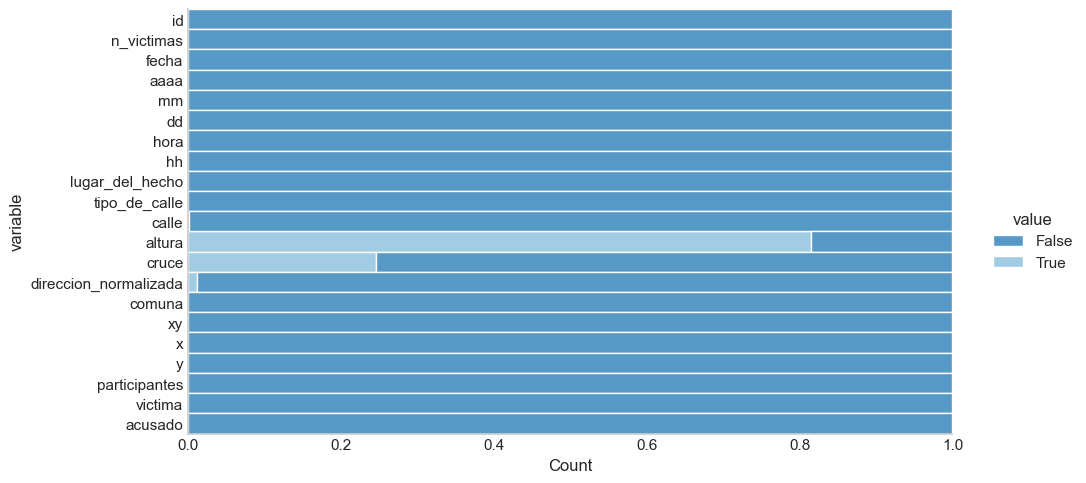

In [15]:
# Proporción de valores nulos por cada variable
(
    df_fallecimientos
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y ='variable',
                hue ='value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)
plt.show()

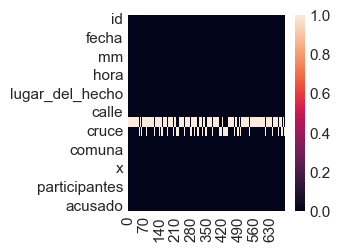

In [16]:
# visualización los valores nulos en todo el conjunto de datos
(
    df_fallecimientos
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data = df
            )
        )
    )
)
plt.show()

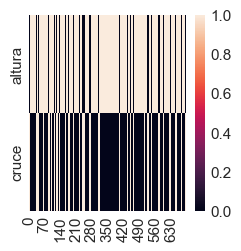

In [17]:
# visualización los valores nulos en las columnas 'altura' y 'cruce'

(
    df_fallecimientos[['altura','cruce']]
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data = df
            )
        )
    )
)

plt.show()

In [18]:
# Cantidad de filas que poseen valores nulos en la columna 'altura' y en la columna'cruce'.
df_fallecimientos[(df_fallecimientos['altura'].isna()) & (df_fallecimientos['cruce'].isna())].shape[0]


42

In [19]:
# Cantidad de filas que poseen datos no nulos en las columnas 'altura' y 'cruce'
df_fallecimientos[(~df_fallecimientos['altura'].isna()) & (~df_fallecimientos['cruce'].isna())].shape[0]


0

Las columnas con mas valores faltantes son 'altura' y 'cruce'. 
Hemos notado que, en el caso de producirse el siniestro en una encrucijada, tendremos un dato en la columna cruce y un valor nulo en la columna altura. Si el siniestro se produce en una altura específica de la arteria tendremos un dato en la columna 'altura' y un valor nulo en 'cruce'.
Solo 42 filas no poseen valores en ambas columnas.

In [20]:
# Filas que no contienen datos en las columnas 'altura' y 'cruce'
nan_altura_y_calle = df_fallecimientos[(df_fallecimientos['altura'].isna()) & (df_fallecimientos['cruce'].isna())]

In [21]:
nan_altura_y_calle.shape

(42, 21)

In [22]:
nan_altura_y_calle.tipo_de_calle.value_counts()

AUTOPISTA    39
CALLE         2
GRAL PAZ      1
AVENIDA       0
Name: tipo_de_calle, dtype: int64

Tenemos 42 filas que no contienen datos en las columnas 'altura' y 'cruce'. 
- 40 Filas corresponden a las arterias clasificadas como autopista. 
- 1 corresponde a la avenida General Paz que en ciertos tramos posee carácterísticas de autopista.
- y 2 corresponden a las arterias clasificadas como calle.

Veamos esas dos calles.

In [23]:
nan_altura_y_calle[nan_altura_y_calle.tipo_de_calle == 'CALLE']

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,direccion_normalizada,comuna,xy,x,y,participantes,victima,acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
559,2020-0039,1,2020-09-01,2020,9,1,19:17:42,19,MURGUIONDO 2700,CALLE,MURGUIONDO,NaN,NaN,MURGUIONDO,9,Point (. .),.,.,PEATON-CARGAS,PEATON,CARGAS


Tenemos una fila con muchos datos faltantes, de la cual solo podemos extraer los datos de la fecha y hora del siniestro, la cantidad de victimas y la caracteristeica de esta.
Y la otra fila podemos extraer información de la ubicación de la columna lugar_del_hecho. Completaremos ese dato en la columna altura.

In [24]:
# Completamos el valor faltante en la fila 559
df_fallecimientos.iloc[559,11] = 2700

* Analisis de columnas sin datos (SD)

In [25]:
(df_fallecimientos == 'SD').sum()

id                        0
n_victimas                0
fecha                     0
aaaa                      0
mm                        0
dd                        0
hora                      1
hh                        1
lugar_del_hecho           1
tipo_de_calle             0
calle                     0
altura                    0
cruce                     0
direccion_normalizada     0
comuna                    0
xy                        0
x                         0
y                         0
participantes             0
victima                   9
acusado                  23
dtype: int64

In [26]:
df_fallecimientos[df_fallecimientos.hora == 'SD']

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,direccion_normalizada,comuna,xy,x,y,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [27]:
df_fallecimientos[df_fallecimientos.lugar_del_hecho == 'SD']

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,direccion_normalizada,comuna,xy,x,y,participantes,victima,acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [28]:
df_fallecimientos[(df_fallecimientos.victima == 'SD') | ((df_fallecimientos.acusado == 'SD') )].shape[0]

27

Tenemos 1 al que le falta la hora, 1 al que le falta el lugar y 27 a los que les falta la caracteristica de los implicados en el siniestro.

* Análisis de los datos segun su tipo

Categóricos

In [29]:
df_fallecimientos.describe(include='category')

,n_victimas,aaaa,mm,dd,hh,tipo_de_calle,comuna,participantes,victima,acusado
count,696,696,696,696,696,696,696,696,696,696
unique,3,6,12,31,25,4,16,41,10,10
top,1,2016,12,20,7,AVENIDA,1,PEATON-PASAJEROS,MOTO,AUTO
freq,676,144,78,31,41,429,90,105,295,204


Podemos ver:

* n_victimas: Los fallecimientos de mas de 1 victima son atípicos.
* Años (aaaa): Poseemos 6 valores y el año con mayor cantidad de siniestros fue el 2016 con 144 siniestros.
* Meses (mm): De los 12 meses del año, diciembre (12) fue el que registró mayor cantidad de siniestros, 78 en total.
* Día (dd): Si consideramos los dias del mes, se registraron mayor cantidad de siniestros el dia número 20.
* Hora (hh): La mayoría de los siniestros ocurrieron entre las 7 y las 7.59 am. 
* Tipo de calle (tipo_de_calle): La mayor cantidad de siniestros se produjeron en avenidas.(429)
* Comuna: La comuna 1 es la que tuvo mayor frecuencia de accidentes.
* Participantes: La mayor cantidad de siniestros se produjeron entre peatomes y transporte de pasajeros.
* Victima: La victima mas frecuente fueron los motociclistas
* Acusado: Los autos son los que poseen la mayor participación en siniestros.

Objetos

In [30]:
df_fallecimientos.describe(include=object)

,id,hora,lugar_del_hecho,calle,altura,cruce,direccion_normalizada,xy,x,y
count,696,696,696,695,130.0,525,688,696,696,696
unique,696,375,683,279,127.0,317,635,606,605,605
top,2016-0001,16:00:00,AV 27 DE FEBRERO Y AV ESCALADA,"PAZ, GRAL. AV.",901.0,"PAZ, GRAL. AV.",27 DE FEBRERO AV. y ESCALADA AV.,Point (. .),.,.
freq,1,10,4,57,2.0,14,5,14,12,12


Podemos ver que la mayor cantidad de siniestros se produjeron en la avenida General Paz. Y podemos ver que 10 ocurrieron a las 16hs.

* Análisis de la columna 'participantes'

In [31]:
lista_participantes = df_fallecimientos.participantes.unique().tolist()
lista_participantes

['MOTO-AUTO',
 'AUTO-PASAJEROS',
 'MOTO-SD',
 'MOTO-PASAJEROS',
 'MOTO-OBJETO FIJO',
 'MOTO-CARGAS',
 'PEATON-AUTO',
 'PEATON-MOTO',
 'PEATON-PASAJEROS',
 'AUTO-AUTO',
 'AUTO-OBJETO FIJO',
 'PEATON-CARGAS',
 'MOTO-MOTO',
 'MULTIPLE',
 'SD-SD',
 'AUTO-CARGAS',
 'AUTO-SD',
 'MOTO-MOVIL',
 'CARGAS-CARGAS',
 'PEATON-SD',
 'BICICLETA-CARGAS',
 'SD-CARGAS',
 'BICICLETA-PASAJEROS',
 'PASAJEROS-PASAJEROS',
 'MOVIL-PASAJEROS',
 'CARGAS-OBJETO FIJO',
 'PEATON-BICICLETA',
 'SD-AUTO',
 'CARGAS-AUTO',
 'BICICLETA-AUTO',
 'MOTO-BICICLETA',
 'SD-MOTO',
 'MOVIL-CARGAS',
 'PASAJEROS-AUTO',
 'AUTO-MOVIL',
 'CARGAS-PASAJEROS',
 'BICICLETA-TREN',
 'BICICLETA-OTRO',
 'MOTO-OTRO',
 'PEATON_MOTO-MOTO',
 'PASAJEROS-SD']

In [32]:
def obtener_codigo_combinacion(combinacion):
    tipos_ordenados = '-'.join(sorted(combinacion.split('-')))
    return tipos_ordenados

codigos_combinaciones = {} # Diccionario para almacenar códigos y sus combinaciones

for combinacion in lista_participantes:
    codigo = obtener_codigo_combinacion(combinacion)
    if codigo not in codigos_combinaciones:
        codigos_combinaciones[codigo] = [combinacion]
    else:
        codigos_combinaciones[codigo].append(combinacion)

# Filtramos los códigos que hacen referencia a la misma pareja de tipos de vehículos
candidatos_repetidos = {codigo: combinaciones for codigo, combinaciones in codigos_combinaciones.items() if len(combinaciones) > 1}

print(f'Combinaciones repetidas')

# combinaciones repetidas
for codigo, combinaciones_repetidas in candidatos_repetidos.items():
    print(f'{combinaciones_repetidas}')


Combinaciones repetidas
['AUTO-PASAJEROS', 'PASAJEROS-AUTO']
['MOTO-SD', 'SD-MOTO']
['AUTO-CARGAS', 'CARGAS-AUTO']
['AUTO-SD', 'SD-AUTO']


Podemos ver que en la columna participantes tenemos combinaciones diferentes que hacen referencia a una misma pareja de vehículos. Tendremos esto en cuenta para analizar esta columna.

-----

# Cantidad de victimas totales a lo largo del tiempo y por año

In [33]:
frecuencia_victimas = df_fallecimientos.n_victimas.value_counts().reset_index()
frecuencia_victimas = frecuencia_victimas.rename(columns={'index': 'cant_victimas', 'n_victimas':'frecuencia'})
total_frecuencia = frecuencia_victimas['frecuencia'].sum()
frecuencia_victimas['porcentajes'] = round((frecuencia_victimas['frecuencia'] / total_frecuencia) * 100,2)
print('frecuencia de la cantidad de victimas fallecidas en accidentes viales entre 2016 y 2021')
print(frecuencia_victimas)

frecuencia de la cantidad de victimas fallecidas en accidentes viales entre 2016 y 2021
  cant_victimas  frecuencia  porcentajes
0             1         676        97.13
1             2          19         2.73
2             3           1         0.14


Gáficos: Frecuencia y porcentaje de fallecidos por accidente entre 2016 y 2021.


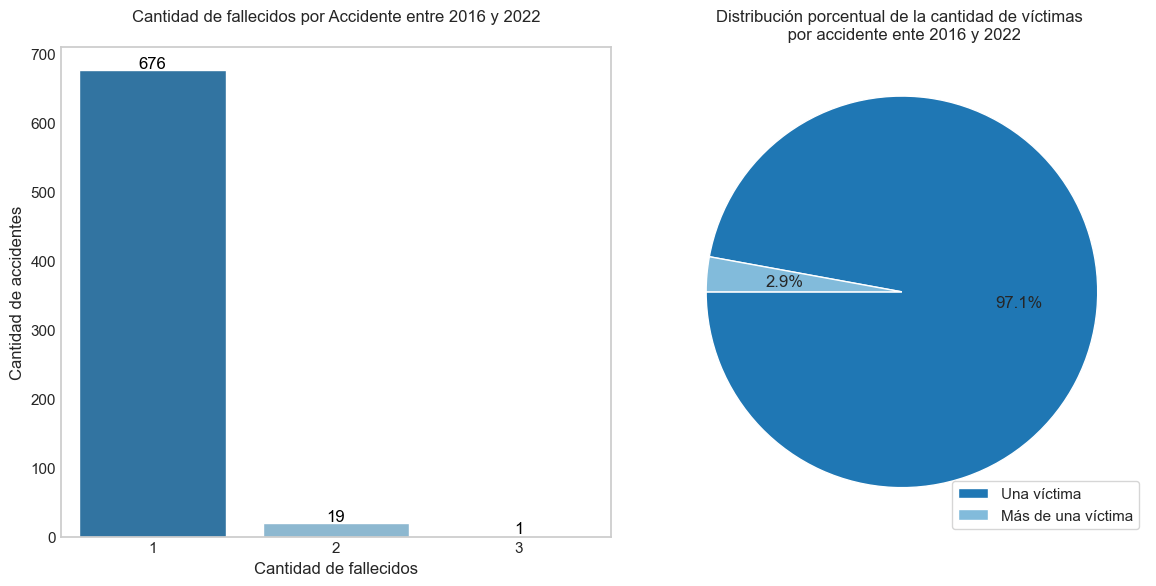

In [34]:
# Gáficos: Frecuencia y porcentaje de fallecidos por accidente entre 2016 y 2021.

# Creamos los gráficos

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1 - Countplot
ax1 = sns.countplot(
    data=df_fallecimientos, 
    x='n_victimas', 
    ax=axes[0])

# Título y etiquetas
ax1.set_xlabel('Cantidad de fallecidos')
ax1.set_ylabel('Cantidad de accidentes')
ax1.set_title('Cantidad de fallecidos por Accidente entre 2016 y 2022\n')

# Agregamos valores en las barras
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Gráfico 2 - Gráfico de torta

una_victima = (df_fallecimientos.n_victimas == 1).sum()
mas_de_una_victima = len(df_fallecimientos) - una_victima

ax2 = axes[1]
wedges, texts, autotexts = ax2.pie([una_victima,mas_de_una_victima],
    startangle=180,
    autopct='%1.1f%%',
)

# Título y etiquetas
ax2.set_title('Distribución porcentual de la cantidad de víctimas \n por accidente ente 2016 y 2022')
ax2.legend(wedges, ['Una víctima', 'Más de una víctima'], loc='lower right')

plt.tight_layout(pad=1)

# Mostramos la figura
plt.show()

Podemos notar que la cantidad de víctimas fue mayormente de 1 persona y muy pco frecuente mas de una.

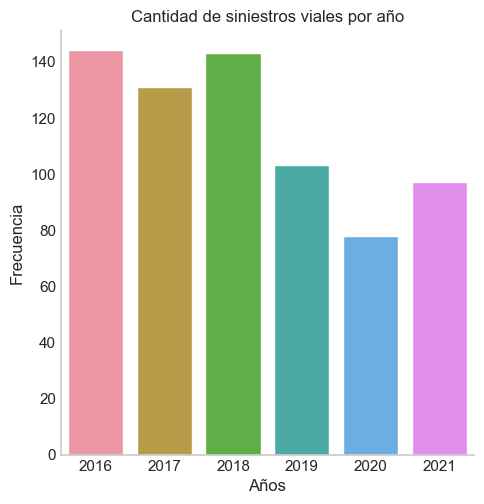

In [35]:
# Gráfico: Histograma de siniestros viales por año

ax = sns.catplot(
    data=df_fallecimientos, 
    x='aaaa', 
    kind='count',
    )

# Agregar título y etiquetas de ejes
plt.title('Cantidad de siniestros viales por año')
plt.xlabel('Años')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()





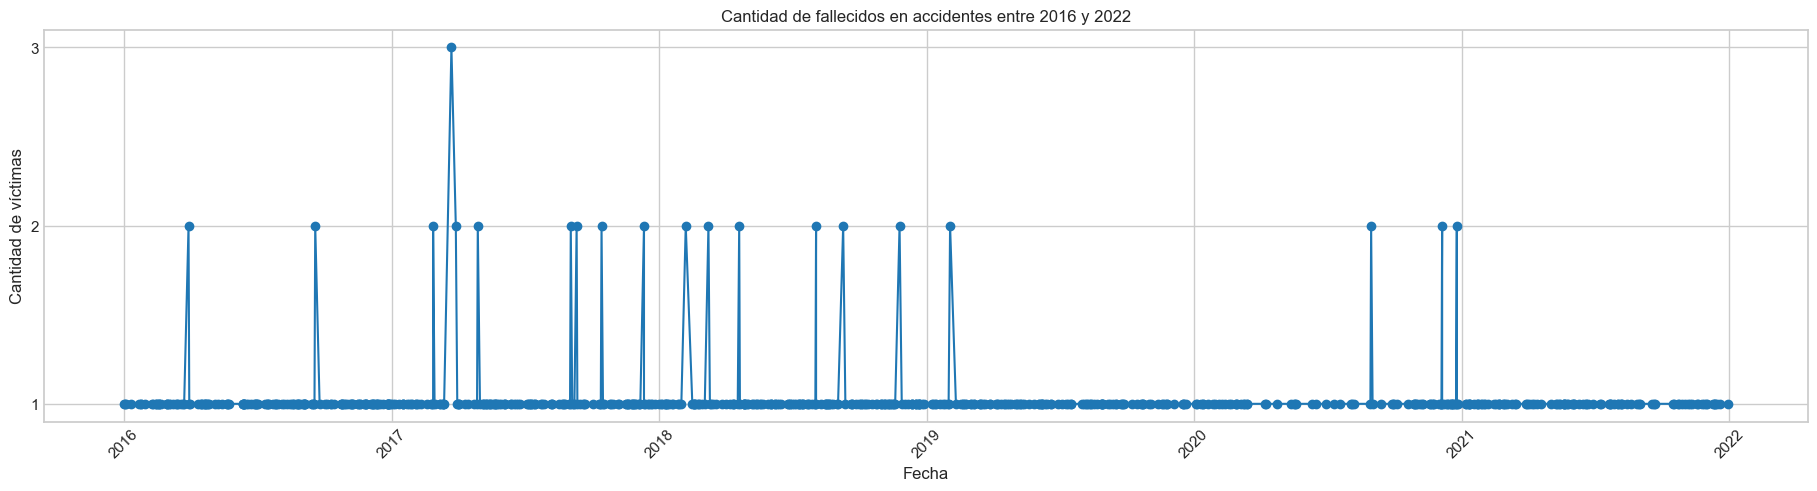

In [36]:
# Cantidad de fallecidos en Accidentes de transito entre 2016 y 2022-

df = df_fallecimientos.sort_values('fecha')

plt.figure(figsize=(18, 4))
plt.plot(df['fecha'], df['n_victimas'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de fallecidos en accidentes entre 2016 y 2022')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))


plt.grid(True)
plt.show()

El gráficos anteriores nos muestan la cantidad de fallecimientos ocurridos en accidentes viales por año entre 2016 y 2021 y el porcentaje de cambio de la cantidad de fallecimientos entre un año y su anterior. 

- Podemos notar un descenso del 27.97% en la cantidad de fallecimientos en 2019 comparados con los acontecidos en 2018. 

    Contexto: Durante 2019 en CABA se tomaron las siguientes medidas: colocación de reductores de velocidad, mayores castigos a los choferes, concientización en más de 50 líneas de colectivos, modificación en la señalética y tiempos de los semáforos, aumento en los controles de alcoholemia y en el uso del cinturón de seguridad. También ese año aumentó en un 9% el rechazó al otorgamiento de licencias de conducir. 
    
    Fuente: https://www.autoweb.com.ar/2020/06/09/en-2019-caba-redujo-el-30-los-muertos-por-accidentes-de-transito/

- Podemos notar un descenso del 24.27% en la cantidad de fallecimientos en 2020 comparados con los acontecidos en 2019. 

    Contexto: El 11 de marzo de 2020 la Organización Mundial de la Salud (OMS) declaró al virus covid-19 como una pandemia. Esto llevó a la implementación de distintas  medidas por parte del gobierno argentino, entre las cuales podemos destacar: la cuarentena, el Aislamiento social, preventivo y obligatorio (ASPO) y la implementación de la educación a distancia. Mencionamos solo estas medidas ya que son las relevantes para el presente estudio. Estas medidas que restringian la circulación y favorecian el aislamiento de los ciudadanos impactaron visiblemente en la canditad de fallecidos en siniestros viales durante el 2020.
    
    Fuente: https://www.boletinoficial.gob.ar/detalleAviso/primera/227042/20200320

- Podemos notar un ascenso del 24.36% en la cantidad de fallecimientos en 2021 comparados con los acontecidos en 2020. 

    Contexto: Las medidas sanitarias tomadas durante el 2020 a causa de la propagación del virus covid-19, fueron experimentando diversas fases en respuesta a la evolución de la situación epidemiológica en cada región del país. Estas fases variaban en términos de flexibilización de restricciones y apertura de actividades económicas y sociales. Por ejemplo se paso del Aislamiento social, Preventivo y Obligatorio(ASPO) al Distanciamiento Social, Preventivo y Obligatorio (DISPO).
    
    Los gráficos muestran que el número de fallecidos en 2021 es similar al de 2018, en ambos ya no existía la prohibición de circulación.

    Fuentes:    https://www.elobservador.com.uy/nota/despues-de-155-dias-argentina-anunciara-el-fin-de-la-cuarentena-en-buenos-aires-y-el-conurbano-202011613059
                https://www.boletinoficial.gob.ar/detalleAviso/primera/241290/20210228

---

In [37]:
df_fallecimientos.to_csv('../data/df_fallecimientos.csv',index=False)

-----

----

# Dataset df_victimas

* Tamaño del dataset y análisis del tipo de variables

In [38]:
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [39]:
df_victimas.shape

(717, 10)

In [40]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [41]:
df_victimas.dtypes.value_counts()

object            6
int64             3
datetime64[ns]    1
dtype: int64

In [42]:
print('El dataset posee', df_victimas.shape[0], 'filas y', df_victimas.shape[1], 'columnas.')
print('Las columnas del dataset son', list(df_victimas.columns))

El dataset posee 717 filas y 10 columnas.
Las columnas del dataset son ['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']


* Diccionario de variables
Para comprender el dataset utilizaremos el siguiente diccionario de variables que se extajo de una pestaña del xls de donde extrajimos los datos.

In [43]:
df_diccionario_variables_del_df_victimas

,variables y definiciones,descripcion
0,ID_hecho,Identificador unico del siniestro
1,FECHA,Fecha en formato dd/mm/aaaa
2,AAAA,Año
3,MM,Mes
4,DD,Día del mes
5,ROL,Posición relativa al vehículo que presentaba la víctima en el momento del siniestro
6,VICTIMA,"Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. clasificación agregada del tipo de vehículos."
7,SEXO,Sexo informado por fuente policial de la víctima
8,EDAD,Edad de la víctima al momento del siniestro


Entendiendo mejor las variables que analizaremos procederemos a modificiar el tipo de alguna de ellas para luego poder estudiarlas mas facilmente.

In [44]:
df_victimas = df_victimas.astype({
    # 'ID_hecho', 
    # 'FECHA', 
    'AAAA': 'category', 
    'MM': 'category', 
    'DD': 'category', 
    'ROL': 'category', 
    'VICTIMA': 'category', 
    'SEXO': 'category',
    'EDAD': 'category', 
    # 'FECHA_FALLECIMIENTO'
    })

In [45]:
df_fallecimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   n_victimas             696 non-null    category      
 2   fecha                  696 non-null    datetime64[ns]
 3   aaaa                   696 non-null    category      
 4   mm                     696 non-null    category      
 5   dd                     696 non-null    category      
 6   hora                   696 non-null    object        
 7   hh                     696 non-null    category      
 8   lugar_del_hecho        696 non-null    object        
 9   tipo_de_calle          696 non-null    category      
 10  calle                  695 non-null    object        
 11  altura                 130 non-null    object        
 12  cruce                  525 non-null    object        
 13  direc

* Analisis de valores nulos y duplicados.

Análisis de filas duplicados.


In [46]:
# Cantidad de valores duplicados por variable
(
    df_victimas
    .duplicated()
    .sum()
)


0

No tenemos filas duplicadas.

Análisis de filas con valores nulos.


In [47]:
# Cantidad de valores nulos por variable
(
    df_victimas
    .isnull()
    .sum()
)

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

No tenemos valores nulos.

* Analisis de columnas sin datos (SD)

In [48]:
(df_victimas == 'SD').sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

Valores únicos de ROL, VICTIMA, SEXO.

In [49]:
df_victimas.ROL.unique().tolist()

['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA']

In [50]:
df_victimas.VICTIMA.unique().tolist()

['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS', 'MOVIL']

In [51]:
df_victimas.SEXO.unique()

['MASCULINO', 'FEMENINO', 'SD']
Categories (3, object): ['FEMENINO', 'MASCULINO', 'SD']

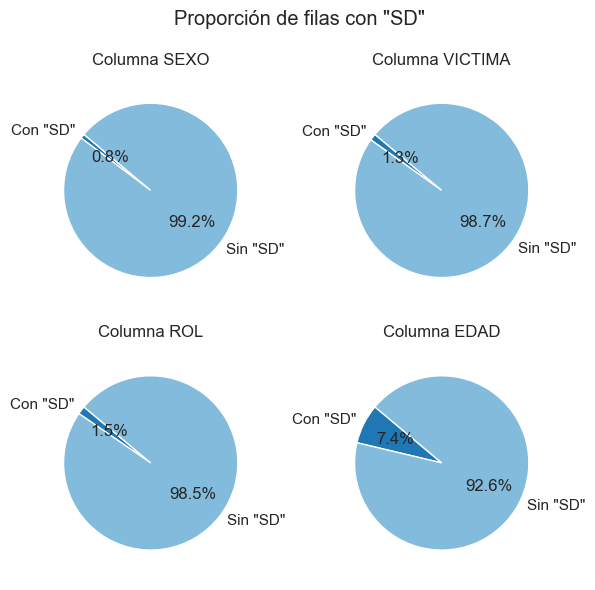

In [52]:
columns = ['SEXO', 'VICTIMA', 'ROL', 'EDAD'] # listade las columnas que vamos a analizar. 
# La columna FECHA_FALLECIMIENTO no se analizará por lo que no veremos la calidad de sus datos.


# Creamos los gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6))

for i, col in enumerate(columns):
    
    proporcion_SD = (df_victimas[col] == 'SD').mean() # Calculamos la proporción de filas que contienen 'SD'

    # Datos que utilizará el gráfico
    labels = ['Con "SD"', 'Sin "SD"']
    sizes = [proporcion_SD, 1 - proporcion_SD]

    # Asignamos el subgráfico correspondiente
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de torta
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Columna {col}')
    ax.axis('equal')  # Asegura que el gráfico sea un círculo.

# Título general
fig.suptitle('Proporción de filas con "SD"')

#  Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Podemos notar que si bien tenemos valores faltantes, estos representan un porcentaje muy bajo de nuestra base de datos.

* Análisis de los datos segun su tipo

Categóricos

In [53]:
df_victimas.describe(include='category')

,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
count,717,717,717,717,717,717,717
unique,6,12,31,5,8,3,86
top,2018,12,20,CONDUCTOR,MOTO,MASCULINO,SD
freq,149,81,32,330,303,545,53


Podemos ver:

* Años (aaaa): Poseemos 6 valores y el año con mayor cantidad victimas fue el 2016 (149 víctimas).
* Meses (mm): De los 12 meses del año, diciembre (12) fue el que registró mayor cantidad de siniestros, 81 en total.
* Día (dd): Si consideramos los dias del mes, se registraron mayor cantidad de fallecimientos el dia número 20.
* Rol: El rol que presentó mayor frecuencia de fallecimientos fue el de CONDUCTOR.
* Sexo: La mayoría de los fallecidos fueron de sexo MASCULINO.
* Edad: La mayor frecuencia en la columna edad es la de SD.

Objetos

In [54]:
df_victimas.describe(include=object)

,ID_hecho,FECHA_FALLECIMIENTO
count,717,717
unique,696,563
top,2017-0035,SD
freq,3,68


Podemos ver que hubo un accidente con 3 victimas.

---

* Título

In [55]:
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [56]:
df =df_victimas
df = df[df.EDAD !='SD']

In [57]:
df_edad_sin_sd = df_victimas
df_edad_sin_sd = df_edad_sin_sd[df_edad_sin_sd.EDAD !='SD']
df_edad_sin_sd['EDAD'] = pd.to_numeric(df_edad_sin_sd['EDAD'], errors='coerce')
df_edad_sin_sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             664 non-null    object        
 1   FECHA                664 non-null    datetime64[ns]
 2   AAAA                 664 non-null    category      
 3   MM                   664 non-null    category      
 4   DD                   664 non-null    category      
 5   ROL                  664 non-null    category      
 6   VICTIMA              664 non-null    category      
 7   SEXO                 664 non-null    category      
 8   EDAD                 664 non-null    int64         
 9   FECHA_FALLECIMIENTO  664 non-null    object        
dtypes: category(6), datetime64[ns](1), int64(1), object(2)
memory usage: 32.4+ KB


* Análisis de victimas  (2016 -2021)

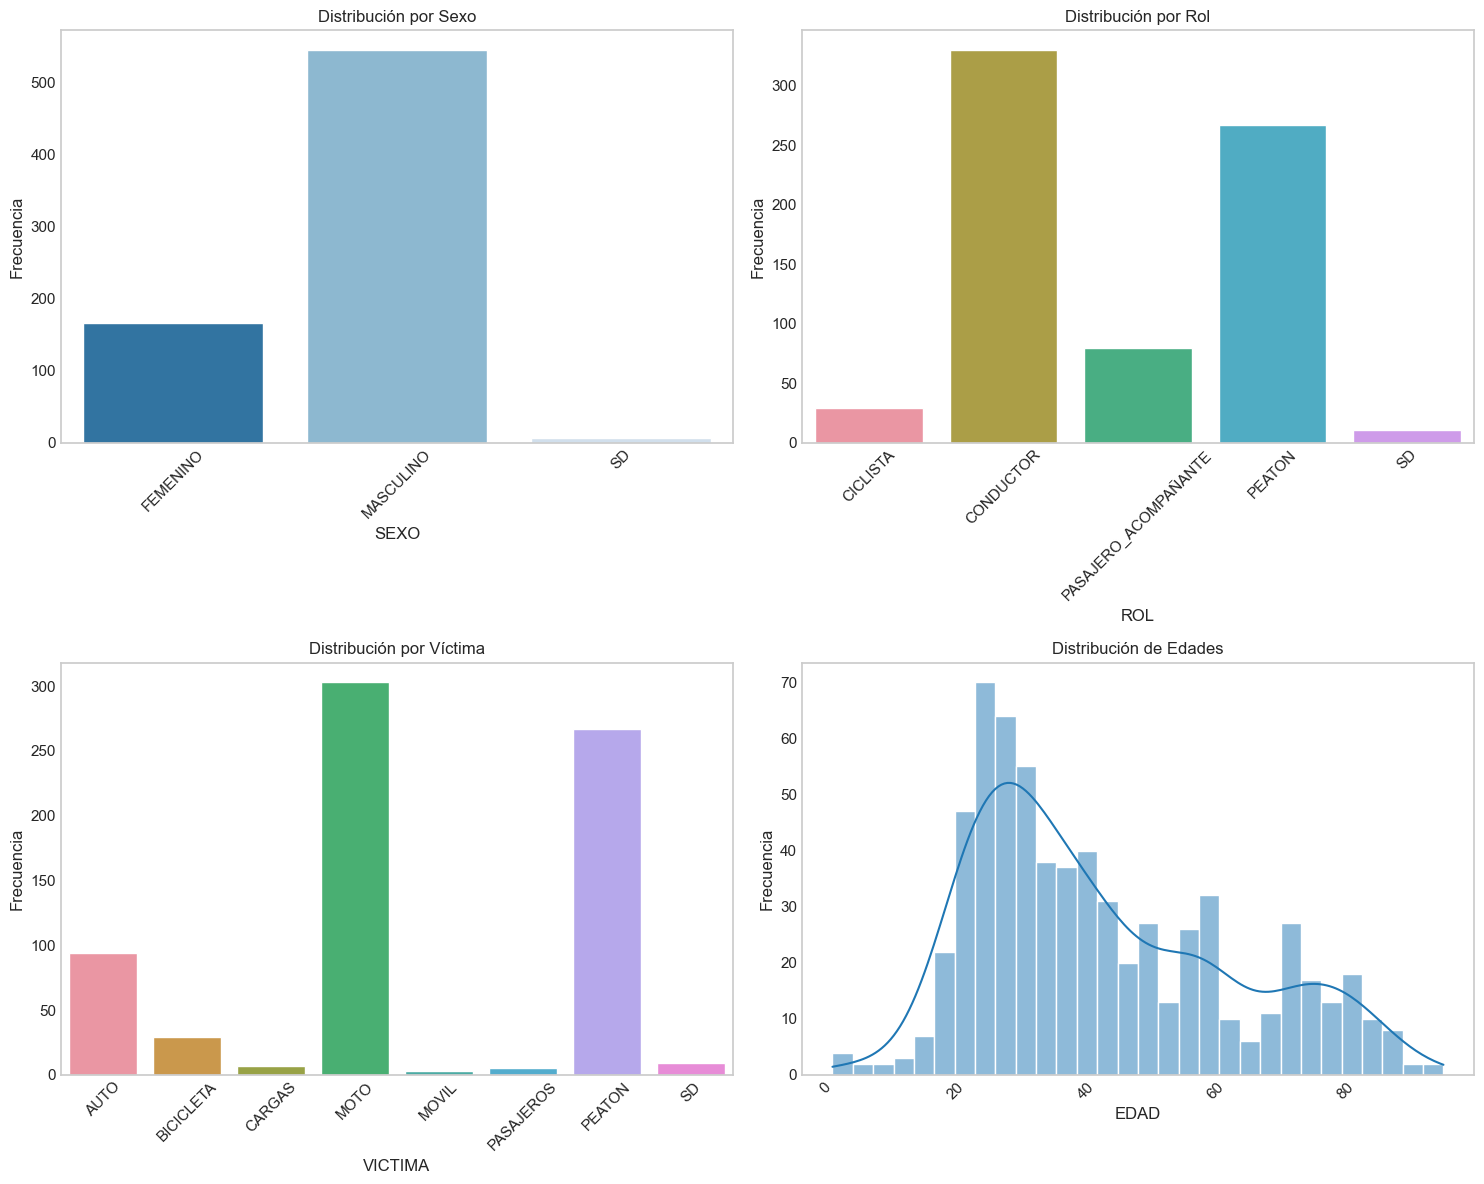

In [58]:
# 2016 -2021

# Creamos los gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de barras para SEXO
sns.countplot(x='SEXO', data=df_victimas, ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Sexo')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].tick_params(axis='x', rotation=45) 


# Gráfico de barras para ROL
sns.countplot(x='ROL', data=df_victimas, ax=axes[0, 1])
axes[0, 1].set_title('Distribución por Rol')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].tick_params(axis='x', rotation=45) 


# Gráfico de barras para VICTIMA
sns.countplot(x='VICTIMA', data=df_victimas, ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Víctima')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45) 


# Histograma para EDAD / No se consideran las victimas que poseen 'SD' en este campo.
sns.histplot(df_edad_sin_sd['EDAD'].dropna().astype(int), bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Edades')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=45) 

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Podemos notar que las víctimas mas frecuentes fueron de sexo msculino. 

Entre las categorías de victimas, las motos y los peatones fueron las víctimas mas frecuentes.

La victima mas frecuente según el rol, fueron los conductores, seguido de los peatones.

El rango de edad mas frecuente de las víctimas se encontró entre 20 y los 40 años.

* Análisis de victimas  (2021)

In [59]:
df_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

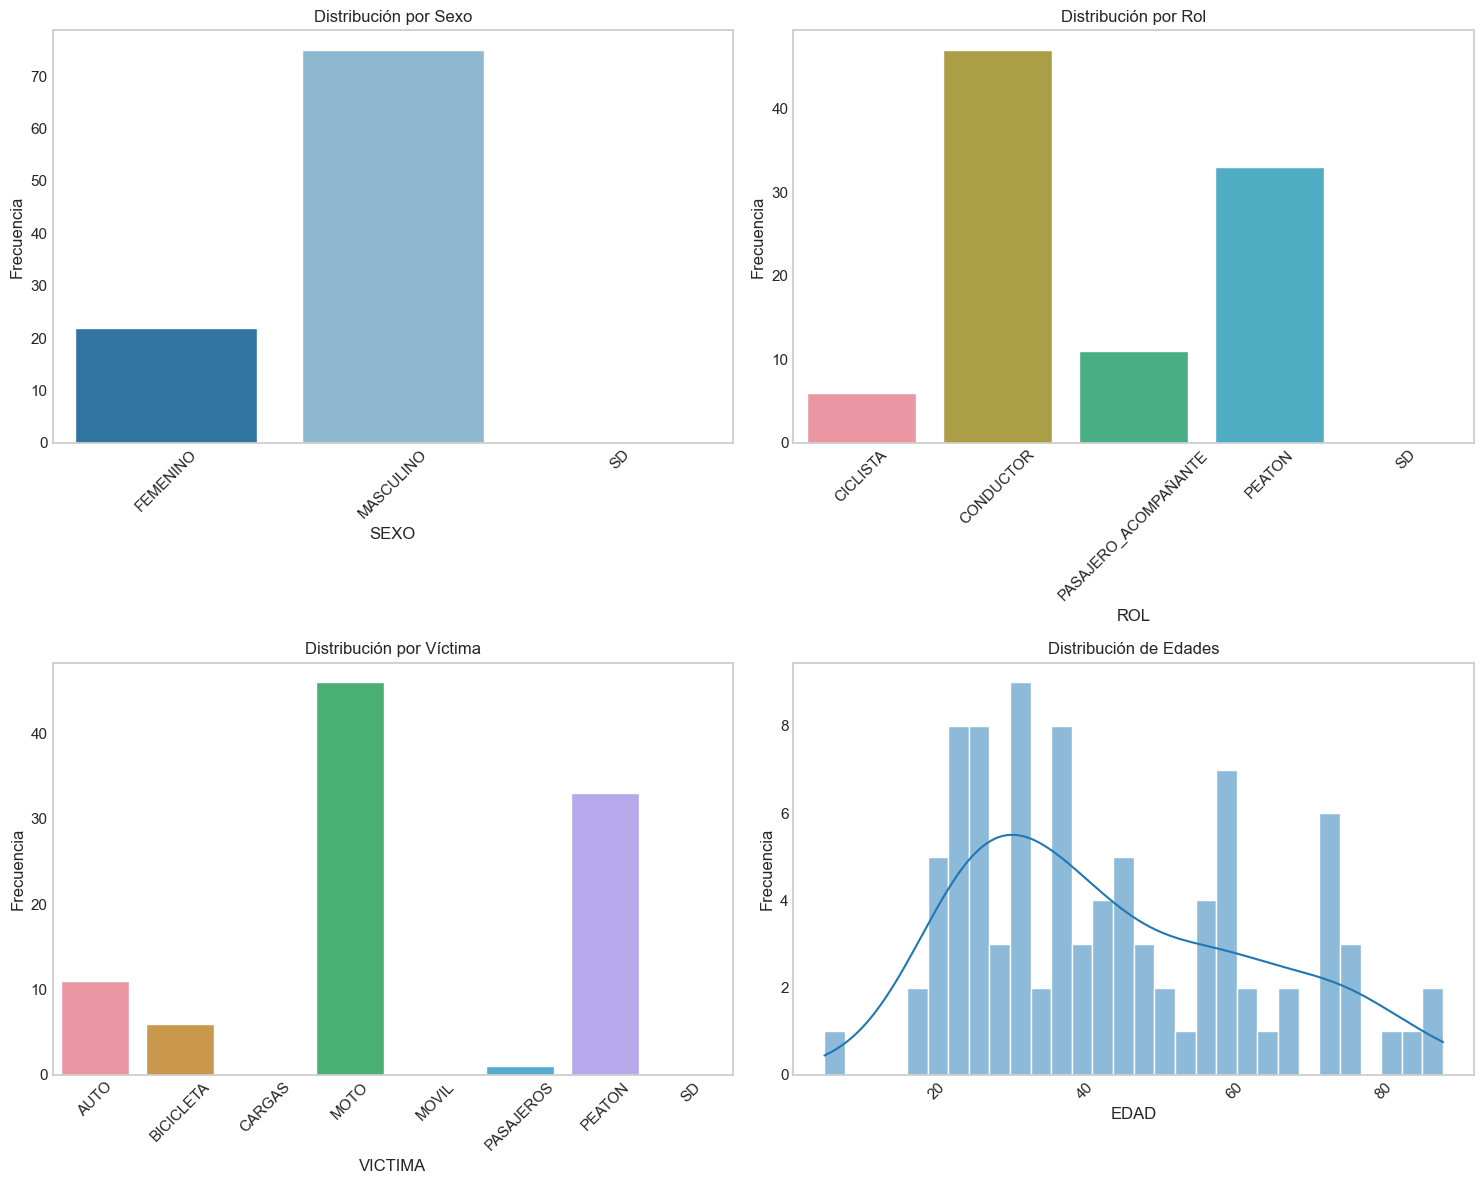

In [60]:
df_2021 = df_victimas[df_victimas.AAAA == 2021]
df_edad_sin_sd = df_edad_sin_sd[df_edad_sin_sd.AAAA==2021]
# Creamos los gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de barras para SEXO
sns.countplot(x='SEXO', data=df_2021, ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Sexo')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].tick_params(axis='x', rotation=45) 


# Gráfico de barras para ROL
sns.countplot(x='ROL', data=df_2021, ax=axes[0, 1])
axes[0, 1].set_title('Distribución por Rol')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].tick_params(axis='x', rotation=45) 


# Gráfico de barras para VICTIMA
sns.countplot(x='VICTIMA', data=df_2021, ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Víctima')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45) 


# Histograma para EDAD / No se consideran las victimas que poseen 'SD' en este campo.
sns.histplot(df_edad_sin_sd['EDAD'].dropna().astype(int), bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Edades')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=45) 

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [62]:
df_victimas.to_csv('../data/victimas.csv',index=False)